# Performance Measures

This [post](binary-classifier.ipynb) serves as a precursor to the current post.

It is often tricker to evaluate classifiers than to evaluate regressors.

## Measuring Accuracy Using Cross-Validation

`cross_val_score()` allows you to evaluate a score using cross-validation. The `train_test_split()` helper function randomly splits your data into training and test sets. Let's load the iris data set and fit a linear support vector machine (SVM) on it:

In [2]:
from 

SyntaxError: invalid syntax (Temp/ipykernel_1436/681706079.py, line 1)

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets. load_iris(return_X_y=True)
X.shape, y.shape
#Let's sample a training set and hold out 40% of the data for testing the classifier.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(90, 4) (90,)
(60, 4) (60,)


The training set has 90 rows, and the test set has 60 rows.

In [6]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9666666666666667

When evaluating different hyperparameters for estimators, there is a risk of overfitting the model on the test set since we can tweak the parameters until the model performs optimally. In overfitting, knowledge about the test set "leaks" into the model, and evaluation metrics no longer report on generalization. 

One solution is to divide the data into another hold-out set, called the validation set, which provides evaluation after the model training is complete. We perform a final assessment using the test set once the experiment appears successful.

A disadvantage of this approach is that we reduce the number of samples available to train the model by partitioning the data into three sets: training, validation, and test sets. Also, our results may depend on a particular random pairing of the training and validation sets.

The solution is to use cross-validation. When doing cross-validation, we no longer need the validation set. However, we still need to hold out the test set for final evaluation. This approach is called *k*-fold CV because we split the training set into _k_ smaller groups. The following depicts the steps of this procedure:

* Train a model using $k - 1$ of the folds as training data
* Use the remaining part of the data to validate the model
* Compute a performance measure such as accuracy

The performance measure reported by *k*-fold CV is the average of the values computed in the loop. The approach is computationally expensive but offers a significant advantage in problems like inverse inference when sample sizes are small. Additionally, the process does not waste too much data as fixing an arbitrary validation set does.

| ![](./images-md/grid_search_cross_validation.png) |
|:--:|
| [Fig. 1 Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) | 


In `sklearn`, the simplest way to perform CV is to use the `cross_val_score()` helper function on the estimator and the dataset. The following shows how to estimate the accuracy of a linear kernel support vector machine on the iris dataset.

In [7]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

The mean score and the standard deviation of the estimator are displayed below.

In [8]:
print(f"{scores.mean():.2f} accuracy with a {scores.std():.2f}")

0.98 accuracy with a 0.02


The score computed at each CV iteration is the scoring method of the estimator. We can change this by using the scoring parameter. For instance, below, we set the scoring parameter to `f1_macro`.

In [9]:
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
scores

array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

In the case of the iris dataset, the samples are balanced across target classes. Therefore, the accuracy and F1 score are almost equal. Let's confirm this.


In [10]:
import numpy as np
values, counts = np.unique(y, return_counts=True)
np.c_[values, counts]

array([[ 0, 50],
       [ 1, 50],
       [ 2, 50]], dtype=int64)

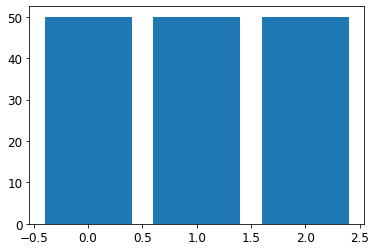

In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.bar(values, counts)
plt.show()

We can see above the target classes are distributed equally in the iris dataset.

The Iris Dataset consists of three different irises' (Setosa, Versicolour, and Virginica) petal and sepal lengths stored in a 150x4 NumPy.ndarray. The rows are the samples, and the columns are Sepal Length, Sepal Width, Petal Length, and Petal Width.

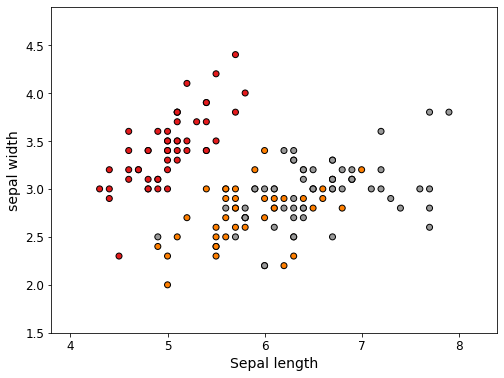

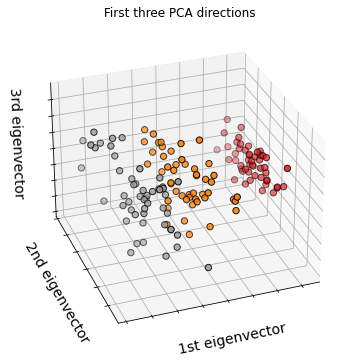

In [12]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()

X = iris.data[:, :2] # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

#plt.xticks(())
#plt.yticks(())

# To get a better understanding of interaction of the dimensions
# plot the first three PCA dimensions

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
  X_reduced[:, 0],
  X_reduced[:, 1],
  X_reduced[:, 2],
  c=y,
  cmap=plt.cm.Set1,
  edgecolor="k",
  s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()


When the `cv` argument is an integer, `cross_val_score` uses the `KFold` or `StratifiedKFold` strategies by default. The latter is used if the estimator derives from the `ClassifierMixin`. It is possible to use other cross validation strategies by passing a cross validation iterator. For instance:

In [13]:
from sklearn.model_selection import ShuffleSplit

n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X, y, cv=cv)

array([0.8       , 0.8       , 0.82222222, 0.71111111, 0.84444444])

Also, we can use an iterable that yields training and test splits as arrays of indices. For example:

In [14]:
def custom_cv_2folds(X):
  n = X.shape[0]
  i = 1
  while i <= 2:
    idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
    yield idx, idx
    i += 1

custom_cv = custom_cv_2folds(X)
cross_val_score(clf, X, y, cv=custom_cv)

array([1.        , 0.77333333])

# Data transformation with held out data

---



Just as testing a predictor on held-out datasets is essential, preprocessing and similar data transformations, including standardization and feature selection, should be learned from a training set and applied to held-out data for prediction. 

In [26]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)

0.9333333333333333

Pipelines make it easier to compose estimators, providing this behavior under cross-validation:

In [27]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
cross_val_score(clf, X, y, cv=cv)

array([0.97777778, 0.93333333, 0.95555556, 0.93333333, 0.97777778])

There are two ways in which the `cross_validate` function differs from `cross_val_score`:

* It allows specifying multiple metrics for evaluation
* It returns a dict containing fit-times, score-times (and optionally training scores and fitted estimators), and the test score.

For single metric evaluation, where the scoring parameter is a string, callable, or None, the keys will be - `['test_score', 'fit_time', 'score_time']`. For multiple metric evaluation, the return value is a dict with the following keys - `['test_<scorer1_name>', 'test_<scorer2_name>', 'test_<scorer...>', 'fit_time', 'score_time']`. By default `return_train_score` is set to `False` to save computation time. To evaluate the scores on the training set it must be set to `True`. Also, we may retain the estimator fitted on each training set by setting `return_estimator=True`.

The multiple metrics can be specified either as a list, tuple or set of predefined scorer names:

In [30]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=0)

scores = cross_validate(clf, X, y, scoring=scoring)
print(scores.keys())
print(sorted(scores.keys()))
scores['test_recall_macro']

dict_keys(['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro'])
['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']


array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

Or as a dict mapping scorer name to a predefined or custom scoring function:

In [32]:
from sklearn.metrics import make_scorer

scoring = {'prec_macro': 'precision_macro',
           'rec_macro': make_scorer(recall_score, average='macro')}

scores = cross_validate(clf, X, y, scoring=scoring, cv=5, return_train_score=True)
sorted(scores.keys())

['fit_time',
 'score_time',
 'test_prec_macro',
 'test_rec_macro',
 'train_prec_macro',
 'train_rec_macro']

In [33]:
scores['train_rec_macro']

array([0.975     , 0.975     , 0.99166667, 0.98333333, 0.98333333])

The following is an example of `cross_validate` using a single metric.

In [34]:
scores = cross_validate(clf, X, y, scoring='precision_macro', cv=5, return_estimator=True)
sorted(scores.keys())

['estimator', 'fit_time', 'score_time', 'test_score']

# Measuring Accuracy Using Cross-Validation

Sometimes you may need more control over the cross-validation process than what `cross_val_score()` and similar functions provide. It is a reasonably straightforward process to implement cross-validation yourself.

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_trian[train_index]
  y_train_folds = (y_train_5[train_index])
  X_test_fold = X_train[test_index]
  y_test_fold = (y_train_5[test_index])

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.